In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [36]:
df = pd.read_csv('../../../NTU_BigData_And_BusinessAnalyzation_Datasets/Orders.csv')

D:\python\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
df.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [38]:
df['SalesOrderSlaveDateTime'] = pd.to_datetime(df['SalesOrderSlaveDateTime'])

In [39]:
# Create time interval columns
df['Date'] = df['SalesOrderSlaveDateTime'].apply(lambda x: x.strftime('%Y-%m-%d')) # Create date column
df['Month'] = df['SalesOrderSlaveDateTime'].apply(lambda x: x.strftime('%m')) # Create month column
df['Weekday'] = df['SalesOrderSlaveDateTime'].dt.weekday_name # Create weekday column
df['Hour'] = df['SalesOrderSlaveDateTime'].apply(lambda x: x.strftime('%H')) # Create hour column

In [47]:
# Extract completed orders
df2 = df.loc[df['StatusDef'].isin(['WaitingToFinish','Finish']),['SalesOrderSlaveDateTime','Date','Month','Weekday','Hour','Quantity']]
df2.head(3)

,SalesOrderSlaveDateTime,Date,Month,Weekday,Hour,Quantity
0,2015-07-03 07:30:02.007,2015-07-03,07,Friday,07,1
1,2015-07-03 07:30:02.023,2015-07-03,07,Friday,07,1
2,2015-07-03 07:30:02.040,2015-07-03,07,Friday,07,1


In [49]:
data = df2.groupby(by='Date')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True) # reset index
data.head(5)

,Date,Quantity
0,2015-05-06,19
1,2015-05-07,28
2,2015-05-08,50
3,2015-05-09,52
4,2015-05-10,76


Text(0.5,0.98,'Sales Volume by Date')

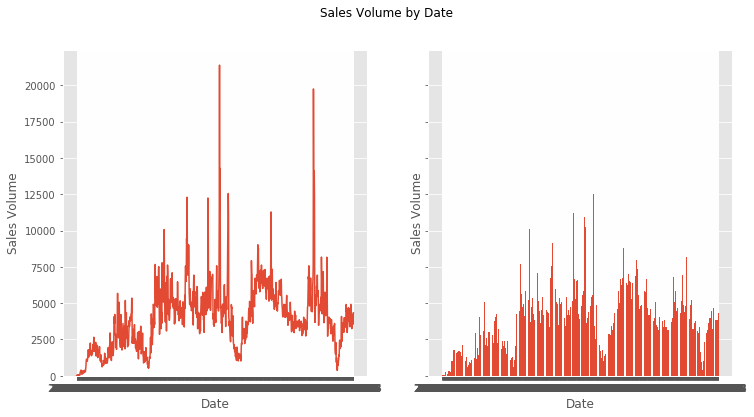

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(data['Date'], data['Quantity'])
axs[0].set_ylabel('Sales Volume')
axs[0].set_xlabel('Date')

axs[1].bar(data['Date'], data['Quantity'])
axs[1].set_ylabel('Sales Volume')
axs[1].set_xlabel('Date')

fig.suptitle('Sales Volume by Date')

In [53]:
data = df2.groupby(by='Month')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True) # reset index
data

,Month,Quantity
0,01,221495
1,02,183204
2,03,427956
3,04,430595
4,05,363928
5,06,327119
6,07,416821
7,08,296000
8,09,325752
9,10,394464


Text(0.5,0.98,'Sales Volume by Month')

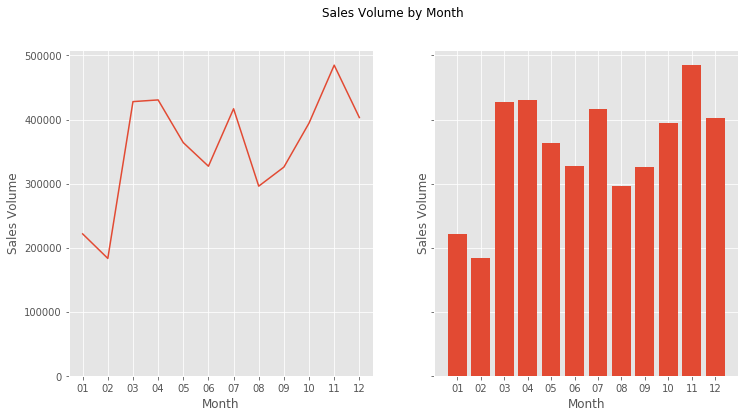

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(data['Month'], data['Quantity'])
axs[0].set_ylabel('Sales Volume')
axs[0].set_xlabel('Month')

axs[1].bar(data['Month'], data['Quantity'])
axs[1].set_ylabel('Sales Volume')
axs[1].set_xlabel('Month')

fig.suptitle('Sales Volume by Month')

In [55]:
data = df2.groupby(by='Weekday')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True) # reset index so as to sort Weekday
data

,Weekday,Quantity
0,Friday,565303
1,Monday,571204
2,Saturday,624562
3,Sunday,660162
4,Thursday,589525
5,Tuesday,628394
6,Wednesday,636087


In [56]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

data.Weekday = pd.Categorical(data.Weekday, 
                      categories=weekday_order,
                      ordered=True)

data.sort_values('Weekday', inplace=True) # sort Weekdays
data

,Weekday,Quantity
1,Monday,571204
5,Tuesday,628394
6,Wednesday,636087
4,Thursday,589525
0,Friday,565303
2,Saturday,624562
3,Sunday,660162


In [57]:
data = data.reset_index(drop=True) # reset index
data

,Weekday,Quantity
0,Monday,571204
1,Tuesday,628394
2,Wednesday,636087
3,Thursday,589525
4,Friday,565303
5,Saturday,624562
6,Sunday,660162


Text(0.5,0.98,'Sales Volume by Weekday')

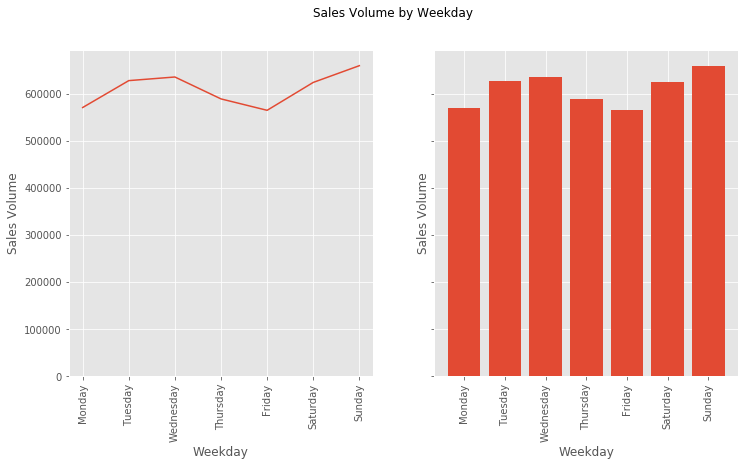

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(data.index.values, data['Quantity']) # must use index values as x for categorical data
axs[0].set_xticks(np.arange(len(data['Weekday'])))
axs[0].set_xticklabels(data['Weekday'], rotation="vertical")
axs[0].set_ylabel('Sales Volume')
axs[0].set_xlabel('Weekday')

axs[1].bar(data.index.values, data['Quantity']) # must use index values as x for categorical data
axs[1].set_xticks(np.arange(len(data['Weekday'])))
axs[1].set_xticklabels(data['Weekday'], rotation="vertical")
axs[1].set_ylabel('Sales Volume')
axs[1].set_xlabel('Weekday')

fig.suptitle('Sales Volume by Weekday')

In [59]:
data = df2.groupby(by='Hour')['Quantity'].sum().to_frame()
data.reset_index(level=0, inplace=True) # reset index so as to sort Weekday
data

,Hour,Quantity
0,00,279182
1,01,195320
2,02,120446
3,03,70502
4,04,44511
5,05,34910
6,06,43435
7,07,70156
8,08,104587
9,09,137627


Text(0.5,0.98,'Sales Volume by Hour')

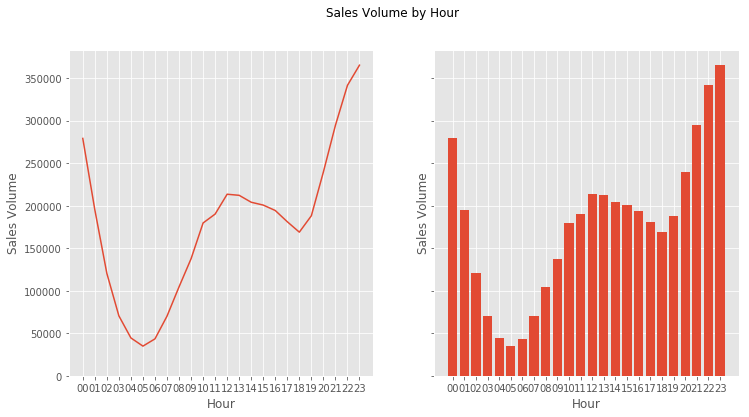

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

axs[0].plot(data['Hour'], data['Quantity'])
axs[0].set_ylabel('Sales Volume')
axs[0].set_xlabel('Hour')

axs[1].bar(data['Hour'], data['Quantity'])
axs[1].set_ylabel('Sales Volume')
axs[1].set_xlabel('Hour')

fig.suptitle('Sales Volume by Hour')